# Mask Convolutional Neural Network for Multi-level Hierarchical Classification

In [ ]:
# To be run on Google Colab!
# !mkdir -p deakin/edu/au/
# !wget --directory-prefix=deakin/edu/au/  https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/data.py   > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/metrics.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/models.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !pip install treelib > /dev/null 2> /dev/null 
# !pip install --upgrade scikit-learn > /dev/null 2> /dev/null 
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from deakin.edu.au import data 
from deakin.edu.au import models 
from deakin.edu.au import utils 
import deakin.edu.au.metrics as metrics
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from graphviz import Digraph
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.metrics import accuracy_score
from keras.callbacks import TensorBoard
from tensorflow.keras.applications import VGG19
import random
from tensorflow import keras
import collections, h5py
from tensorflow.python.keras.saving import hdf5_format


%load_ext autoreload
%autoreload 2
%load_ext tensorboard


# Loading data

## CIFAR100

In [ ]:
#Load dataset
dataset = data.Cifar100()


## Stanford Cars

In [ ]:
#Load dataset
# dataset = Stanford_Cars(image_size=(64,64))
dataset = data.get_Stanford_Cars(image_size=(64, 64), batch_size=128)


## CU_Birds_200_2011

In [ ]:
#Load dataset
dataset = CU_Birds_200_2011(image_size=(64,64))


In [5]:
# plot the tree
tree = dataset.get_tree()
tree.show()
# Set variables
epochs = 150
# VGG-19
conv_base = 'vgg19'
learning_rate=1e-5
# NIN
# conv_base = 'nin'
# learning_rate=1e-3

# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
performance_callback_val = models.performance_callback(dataset.val_dataset, 
                                                       dataset.get_tree(),
                                                       conv_base,
                                                       name=dataset.name,
                                                       save_model=True,
                                                       title='Validation set')

performance_callback_train = models.performance_callback(dataset.train_dataset, 
                                                         dataset.get_tree(),
                                                         conv_base,
                                                         name=dataset.name,
                                                         title='Training set')


Root
├── Convertible -> (L0_0)
│   ├── Aston Convertible -> (L1_4)
│   │   ├── Aston Martin V8 Vantage Convertible 2012 -> (L2_7)
│   │   └── Aston Martin Virage Convertible 2012 -> (L2_9)
│   ├── Audi Convertible -> (L1_6)
│   │   ├── Audi RS 4 Convertible 2008 -> (L2_11)
│   │   └── Audi S5 Convertible 2012 -> (L2_20)
│   ├── BMW Convertible -> (L1_14)
│   │   ├── BMW 1 Series Convertible 2012 -> (L2_26)
│   │   ├── BMW 6 Series Convertible 2007 -> (L2_30)
│   │   ├── BMW M6 Convertible 2010 -> (L2_35)
│   │   └── BMW Z4 Convertible 2012 -> (L2_37)
│   ├── Bentley Convertible -> (L1_11)
│   │   └── Bentley Continental Supersports Conv. Convertible 2012 -> (L2_38)
│   ├── Bugatti Convertible -> (L1_19)
│   │   └── Bugatti Veyron 16.4 Convertible 2009 -> (L2_44)
│   ├── Chevrolet Convertible -> (L1_26)
│   │   ├── Chevrolet Camaro Convertible 2012 -> (L2_58)
│   │   └── Chevrolet Corvette Convertible 2012 -> (L2_54)
│   ├── Chrysler Convertible -> (L1_37)
│   │   ├── Chrysler Crossfire

# Visualization

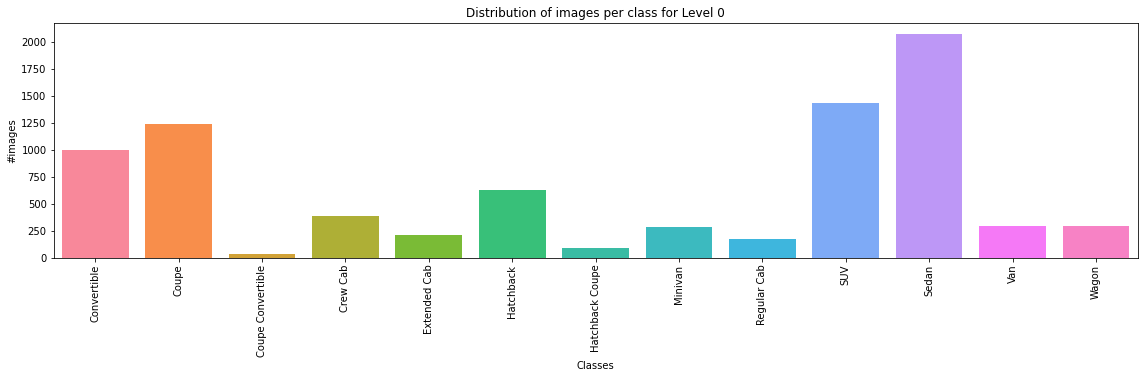

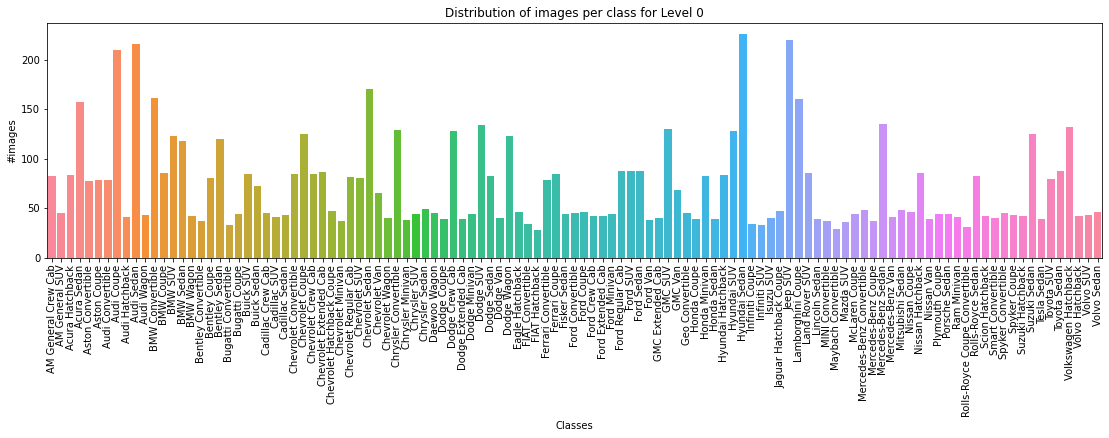

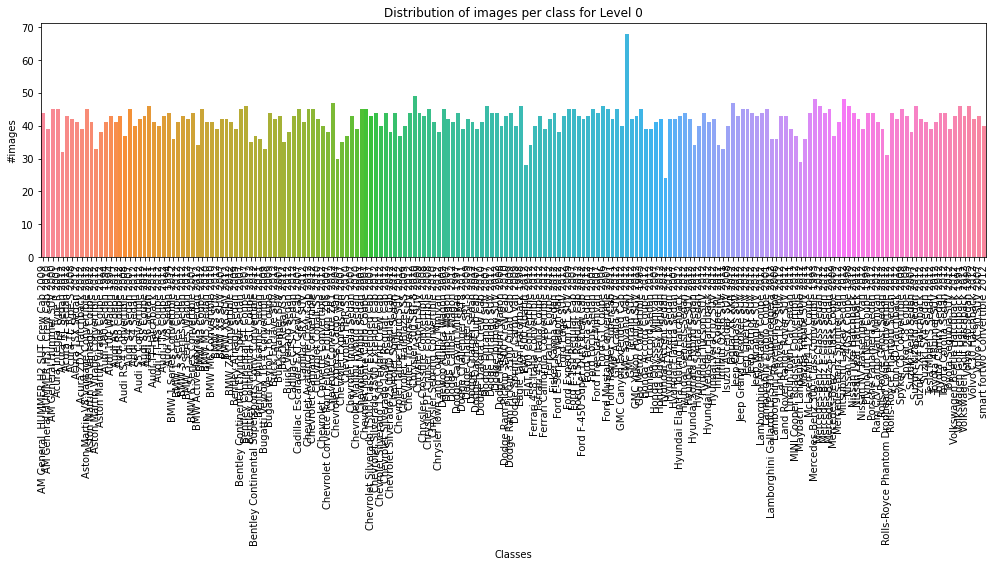

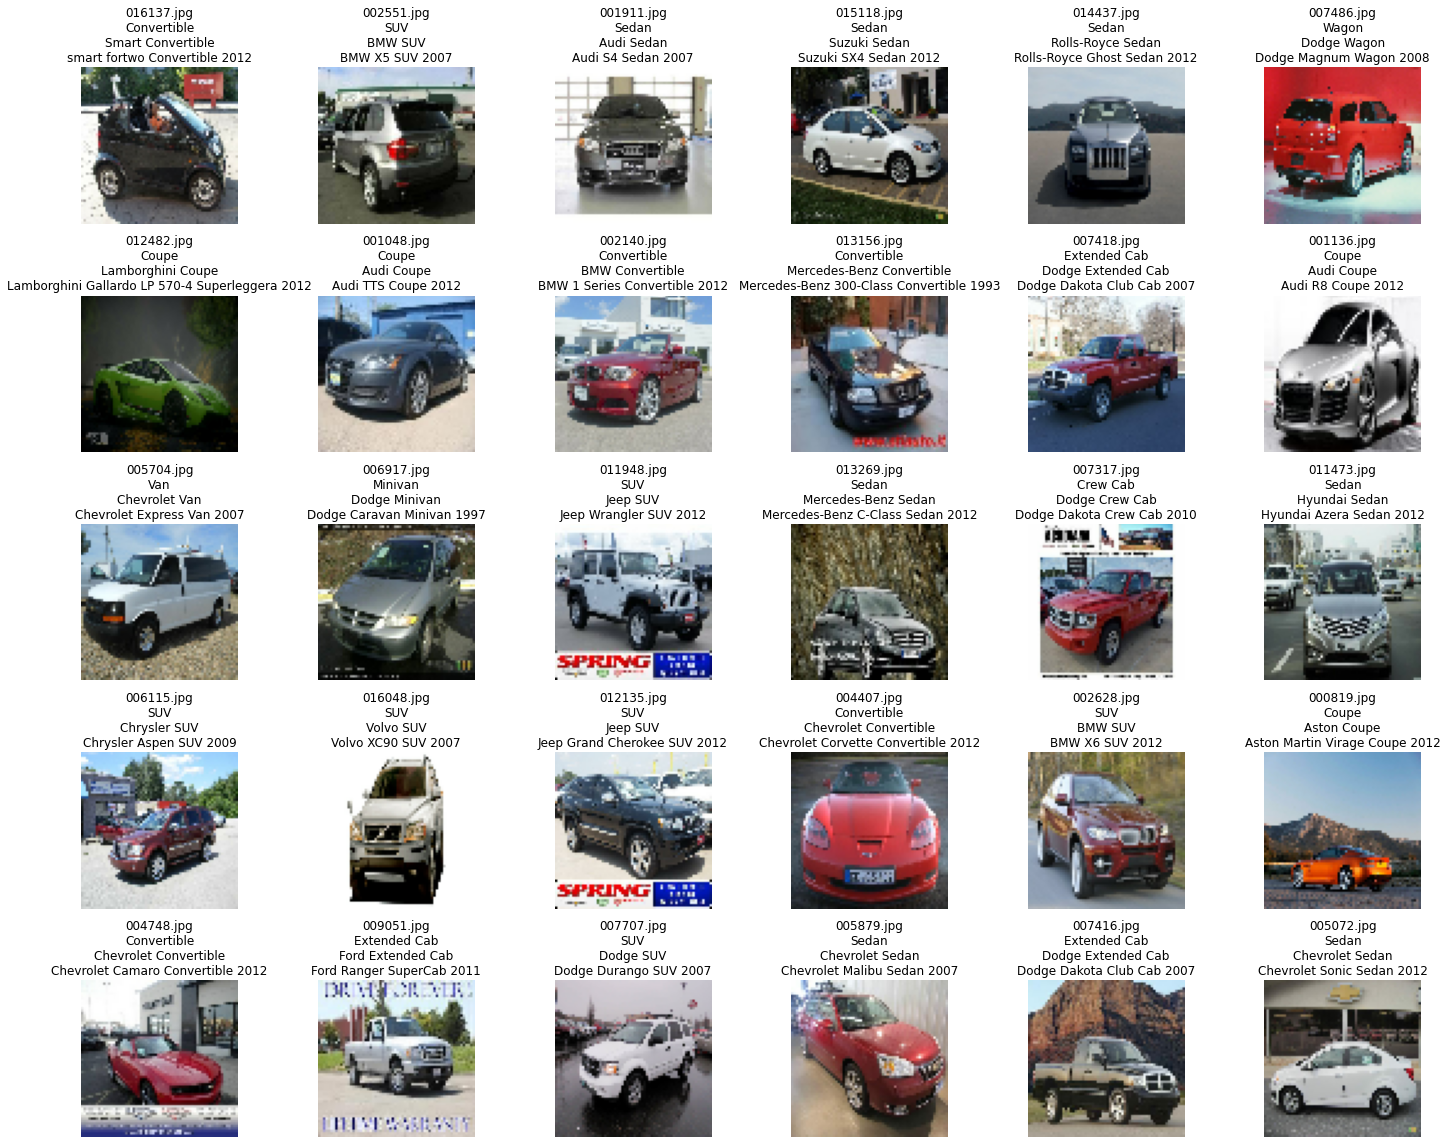

In [6]:
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_0']].groupby(['label_level_0']).size().reset_index()
df = df.rename(columns={0:'count'})
g = sns.catplot(x='label_level_0', y= 'count',  data=df, kind='bar', 
                legend=False,height=4,aspect=4,saturation=1)
(g.despine(top=False,right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_1']].groupby(['label_level_1']).size().reset_index()
df = df.rename(columns={0:'count'})
g = sns.catplot(x='label_level_1', y= 'count',  data=df, kind='bar', 
                legend=False,height=4,aspect=4,saturation=1)
(g.despine(top=False,right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_2']].groupby(['label_level_2']).size().reset_index()
df = df.rename(columns={0:'count'})
g = sns.catplot(x='label_level_2', y= 'count',  data=df, kind='bar', 
                legend=False,height=4,aspect=4,saturation=1)
(g.despine(top=False,right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Examples of images.
###############################################
plt.figure(figsize=(20, 16))
for x, y in dataset.get_pipeline(dataset.train_labels_df, 'all'):
    for i in range(30):
        file_name = y[3].numpy()[i].decode("utf-8")
        y_l0 = dataset.labels[0][y[0].numpy()[i]]
        y_l1 = dataset.labels[1][y[1].numpy()[i]]
        y_l2 = dataset.labels[2][y[2].numpy()[i]]
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(x.numpy()[i])
        plt.title(file_name + "\n" + y_l0 + "\n" + y_l1 + "\n" + y_l2)
        plt.axis("off")
    break
plt.tight_layout() 
plt.show()


# Training all models

In [ ]:
# Create the model
mnets_model = models.get_mnets(dataset.num_classes, 
                               dataset.image_size, 
                               conv_base=conv_base,
                               learning_rate=learning_rate)
mnets_model.summary()
#train model
history_mnets_model = mnets_model.fit(dataset.train_dataset, 
                                      validation_data = dataset.val_dataset, 
                                      epochs=epochs,
                                      callbacks=[performance_callback_val])
utils.learning_plots(history_mnets_model)
plot_model(mnets_model)


Model: "mnets_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_base0 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base1 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base2 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
________________________________________________________________________________________

2021-10-04 06:49:06.919179: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2021-10-04 06:49:11.247200: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-04 06:49:11.248076: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


64/64 [==============================] - 37s 473ms/step - loss: 4.1306 - out_level_0_loss: 2.1823 - out_level_1_loss: 4.7630 - out_level_2_loss: 5.4465 - out_level_0_accuracy: 0.2559 - out_level_1_accuracy: 0.0239 - out_level_2_accuracy: 0.0038 - val_loss: 4.0057 - val_out_level_0_loss: 2.0555 - val_out_level_1_loss: 4.5885 - val_out_level_2_loss: 5.3732 - val_out_level_0_accuracy: 0.3097 - val_out_level_1_accuracy: 0.0366 - val_out_level_2_accuracy: 0.0060
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

2021-10-04 06:50:31.140232: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 3/150
64/64 [==============================] - 27s 420ms/step - loss: 3.7552 - out_level_0_loss: 1.7873 - out_level_1_loss: 4.3080 - out_level_2_loss: 5.1702 - out_level_0_accuracy: 0.3897 - out_level_1_accuracy: 0.0728 - out_level_2_accuracy: 0.0188 - val_loss: 3.7599 - val_out_level_0_loss: 1.7691 - val_out_level_1_loss: 4.3441 - val_out_level_2_loss: 5.1664 - val_out_level_0_accuracy: 0.3784 - val_out_level_1_accuracy: 0.0637 - val_out_level_2_accuracy: 0.0172
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+----

64/64 [==============================] - 27s 415ms/step - loss: 2.4837 - out_level_0_loss: 1.0202 - out_level_1_loss: 2.6734 - out_level_2_loss: 3.7574 - out_level_0_accuracy: 0.6562 - out_level_1_accuracy: 0.3415 - out_level_2_accuracy: 0.1892 - val_loss: 3.6449 - val_out_level_0_loss: 1.7063 - val_out_level_1_loss: 4.2315 - val_out_level_2_loss: 4.9971 - val_out_level_0_accuracy: 0.4010 - val_out_level_1_accuracy: 0.1157 - val_out_level_2_accuracy: 0.0473
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 418ms/step - loss: 1.6351 - out_level_0_loss: 0.6249 - out_level_1_loss: 1.7023 - out_level_2_loss: 2.5781 - out_level_0_accuracy: 0.7926 - out_level_1_accuracy: 0.5621 - out_level_2_accuracy: 0.4034 - val_loss: 3.8148 - val_out_level_0_loss: 1.8234 - val_out_level_1_loss: 4.5602 - val_out_level_2_loss: 5.0608 - val_out_level_0_accuracy: 0.4254 - val_out_level_1_accuracy: 0.1249 - val_out_level_2_accuracy: 0.0687
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 416ms/step - loss: 1.0627 - out_level_0_loss: 0.4259 - out_level_1_loss: 1.1078 - out_level_2_loss: 1.6544 - out_level_0_accuracy: 0.8617 - out_level_1_accuracy: 0.7094 - out_level_2_accuracy: 0.5942 - val_loss: 4.3480 - val_out_level_0_loss: 2.2411 - val_out_level_1_loss: 5.0797 - val_out_level_2_loss: 5.7232 - val_out_level_0_accuracy: 0.3754 - val_out_level_1_accuracy: 0.1470 - val_out_level_2_accuracy: 0.0672
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.6019 - out_level_0_loss: 0.2802 - out_level_1_loss: 0.4000 - out_level_2_loss: 1.1254 - out_level_0_accuracy: 0.9086 - out_level_1_accuracy: 0.9008 - out_level_2_accuracy: 0.7124 - val_loss: 5.1701 - val_out_level_0_loss: 2.5578 - val_out_level_1_loss: 6.2054 - val_out_level_2_loss: 6.7471 - val_out_level_0_accuracy: 0.4400 - val_out_level_1_accuracy: 0.1445 - val_out_level_2_accuracy: 0.0682
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.2311 - out_level_0_loss: 0.1082 - out_level_1_loss: 0.1794 - out_level_2_loss: 0.4058 - out_level_0_accuracy: 0.9724 - out_level_1_accuracy: 0.9570 - out_level_2_accuracy: 0.9030 - val_loss: 6.0931 - val_out_level_0_loss: 3.0351 - val_out_level_1_loss: 6.8981 - val_out_level_2_loss: 8.3460 - val_out_level_0_accuracy: 0.4565 - val_out_level_1_accuracy: 0.1510 - val_out_level_2_accuracy: 0.0697
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0910 - out_level_0_loss: 0.0282 - out_level_1_loss: 0.0562 - out_level_2_loss: 0.1886 - out_level_0_accuracy: 0.9967 - out_level_1_accuracy: 0.9917 - out_level_2_accuracy: 0.9571 - val_loss: 6.5163 - val_out_level_0_loss: 3.1343 - val_out_level_1_loss: 7.9197 - val_out_level_2_loss: 8.4948 - val_out_level_0_accuracy: 0.4764 - val_out_level_1_accuracy: 0.1602 - val_out_level_2_accuracy: 0.0816
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0335 - out_level_0_loss: 0.0071 - out_level_1_loss: 0.0220 - out_level_2_loss: 0.0714 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9969 - out_level_2_accuracy: 0.9877 - val_loss: 7.1961 - val_out_level_0_loss: 3.4211 - val_out_level_1_loss: 8.1856 - val_out_level_2_loss: 9.9815 - val_out_level_0_accuracy: 0.4883 - val_out_level_1_accuracy: 0.1716 - val_out_level_2_accuracy: 0.0846
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 418ms/step - loss: 0.0121 - out_level_0_loss: 0.0020 - out_level_1_loss: 0.0030 - out_level_2_loss: 0.0314 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9962 - val_loss: 7.5630 - val_out_level_0_loss: 3.5826 - val_out_level_1_loss: 8.5055 - val_out_level_2_loss: 10.6009 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1816 - val_out_level_2_accuracy: 0.0930
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0120 - out_level_0_loss: 0.0017 - out_level_1_loss: 0.0032 - out_level_2_loss: 0.0313 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9969 - val_loss: 7.8409 - val_out_level_0_loss: 3.7384 - val_out_level_1_loss: 8.6531 - val_out_level_2_loss: 11.1313 - val_out_level_0_accuracy: 0.4861 - val_out_level_1_accuracy: 0.1813 - val_out_level_2_accuracy: 0.0784
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 53/150
64/64 [==============================] - 27s 413ms/step - loss: 0.0107 - out_level_0_loss: 0.0016 - out_level_1_loss: 0.0020 - out_level_2_loss: 0.0285 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 7.6969 - val_out_level_0_loss: 3.8219 - val_out_level_1_loss: 8.8439 - val_out_level_2_loss: 10.4247 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1808 - val_out_level_2_accuracy: 0.0988
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--

64/64 [==============================] - 26s 411ms/step - loss: 0.0089 - out_level_0_loss: 0.0016 - out_level_1_loss: 0.0030 - out_level_2_loss: 0.0220 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9977 - val_loss: 7.8685 - val_out_level_0_loss: 3.8672 - val_out_level_1_loss: 8.8213 - val_out_level_2_loss: 10.9170 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1828 - val_out_level_2_accuracy: 0.0958
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 63/150
64/64 [==============================] - 27s 412ms/step - loss: 0.0090 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0020 - out_level_2_loss: 0.0234 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9972 - val_loss: 7.7285 - val_out_level_0_loss: 3.9170 - val_out_level_1_loss: 8.9695 - val_out_level_2_loss: 10.2989 - val_out_level_0_accuracy: 0.4853 - val_out_level_1_accuracy: 0.1806 - val_out_level_2_accuracy: 0.1037
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--

64/64 [==============================] - 26s 411ms/step - loss: 0.0073 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0028 - out_level_2_loss: 0.0174 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9974 - val_loss: 7.6955 - val_out_level_0_loss: 3.9301 - val_out_level_1_loss: 8.8807 - val_out_level_2_loss: 10.2759 - val_out_level_0_accuracy: 0.4846 - val_out_level_1_accuracy: 0.1811 - val_out_level_2_accuracy: 0.1067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0082 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0018 - out_level_2_loss: 0.0212 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9971 - val_loss: 7.7422 - val_out_level_0_loss: 3.9285 - val_out_level_1_loss: 9.0378 - val_out_level_2_loss: 10.2602 - val_out_level_0_accuracy: 0.4873 - val_out_level_1_accuracy: 0.1801 - val_out_level_2_accuracy: 0.1012
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

In [ ]:
mnets_model = keras.models.load_model("models/mnets_model_" + dataset.name + "_" + conv_base)

y_true, y_pred = metrics.predict_from_pipeline(mnets_model,dataset.val_dataset)
metrics.performance_report(y_true, y_pred,dataset.get_tree())


In [ ]:
# Create the model
mnets_model_pred = mnets_model.predict(dataset.X_test)
mnets_model_accuracy = metrics.get_top_k_taxonomical_accuracy(dataset.y_test, mnets_model_pred)
mnets_model_accuracy = [x * 100 for x in mnets_model_accuracy]
oracle_accuracy = utils.get_potential_improvement(dataset.y_test, 
                                                  mnets_model_pred,
                                                  dataset.taxonomy)
plt = utils.plot_potential_improvement(oracle_accuracy, mnets_model_accuracy)
ax = plt.gca()
ax.set_ylim(0, 41)
plt.savefig('plots/oracle_' + dataset.name + '_' + conv_base + '.eps', bbox_inches = 'tight')
plt.show()


In [ ]:
# Create the model
mout_model = models.get_mout_model(dataset.num_classes, 
                                   dataset.image_size, 
                                   conv_base=conv_base,
                                   learning_rate=learning_rate)
mout_model.summary()
#train model
history_mout_model = mout_model.fit(dataset.train_dataset, 
                                    validation_data = dataset.val_dataset, 
                                    epochs=epochs,
                                    callbacks=[performance_callback_val])
utils.learning_plots(history_mout_model)
plot_model(mout_model)


In [ ]:
# # Create the model
# BCNN1_model = models.get_BCNN1(dataset.num_classes, 
#                                dataset.image_size, 
#                                conv_base=conv_base,
#                                learning_rate=learning_rate)
# BCNN1_model.summary()
# #train model
# history_BCNN1_model = BCNN1_model.fit(dataset.train_dataset, 
#                                       validation_data = dataset.val_dataset, 
#                                       epochs=epochs,
#                                       callbacks=[performance_callback_val])
# utils.learning_plots(history_BCNN1_model)
# plot_model(BCNN1_model)


In [ ]:
# Create the model
BCNN1_reversed_model = models.get_BCNN1(dataset.num_classes, 
                                        dataset.image_size, 
                                        reverse=True, 
                                        conv_base=conv_base, 
                                        learning_rate=learning_rate)
BCNN1_reversed_model.summary()
#train model
history_BCNN1_reversed_model = BCNN1_reversed_model.fit(dataset.train_dataset, 
                                                        validation_data = dataset.val_dataset, 
                                                        epochs=epochs,
                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN1_reversed_model)
plot_model(BCNN1_reversed_model)


In [ ]:
# Create the model
BCNN2_model = models.get_BCNN2(dataset.num_classes, 
                               dataset.image_size, 
                               conv_base=conv_base, 
                               learning_rate=learning_rate)
BCNN2_model.summary()
#train model
history_BCNN2_model = BCNN2_model.fit(dataset.train_dataset, 
                                      validation_data = dataset.val_dataset, 
                                      epochs=epochs,
                                      callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN2_model)
plot_model(BCNN2_model)


In [ ]:
# Create the model
BCNN2_reversed_model = models.get_BCNN2(dataset.num_classes, 
                                        dataset.image_size, 
                                        reverse=True, 
                                        conv_base=conv_base,
                                        learning_rate=learning_rate)
BCNN2_reversed_model.summary()
#train model
history_BCNN2_reversed_model = BCNN2_reversed_model.fit(dataset.train_dataset, 
                                                        validation_data = dataset.val_dataset,  
                                                        epochs=epochs,
                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN2_reversed_model)
plot_model(BCNN2_reversed_model)


In [ ]:
# Create the model
MLPH_model = models.get_MLPH_model(dataset.num_classes, 
                                   dataset.image_size,
                                   learning_rate=learning_rate)
MLPH_model.summary()
#train model
history_MLPH_model = MLPH_model.fit(dataset.train_dataset, 
                                    validation_data = dataset.val_dataset, 
                                    epochs=epochs,
                                    callbacks=[performance_callback_val])
utils.learning_plots(history_MLPH_model)
plot_model(MLPH_model,show_shapes=False, expand_nested=False)


In [ ]:
# Create the model
baseline_model = models.get_Baseline_model(dataset.num_classes, 
                                           dataset.image_size, 
                                           dataset.taxonomy, 
                                           conv_base=conv_base,
                                           learning_rate=learning_rate)
baseline_model.summary()
#train model
history_baseline_model = baseline_model.fit(dataset.get_pipeline(dataset.train_labels_df, 'last_level'),
                                            validation_data = dataset.get_pipeline(dataset.val_labels_df, 
                                                                                   'last_level'),
                                            epochs=epochs,
                                            callbacks=[performance_callback_val])
utils.learning_plots(history_baseline_model)
plot_model(baseline_model)


In [ ]:
# tensorboard = TensorBoard(log_dir='/tmp/logs', histogram_freq=0,
#                           write_graph=True, write_images=False)
# Create the model
mcnn_model = models.get_Masked_Output_Net(dataset.num_classes,
                                          dataset.image_size,
                                          dataset.taxonomy,
                                          conv_base=conv_base,
                                          learning_rate=learning_rate)
mcnn_model.summary(line_length=110)
#train model
history_mcnn_model_model = mcnn_model.fit(dataset.train_dataset,
                                          validation_data = dataset.val_dataset, 
                                          epochs=epochs,
                                          callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_model_model)
plot_model(mcnn_model)


In [ ]:
# Create the model
mcnn_mnets_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                dataset.image_size,
                                                dataset.taxonomy,
                                                conv_base=conv_base,
                                                learning_rate=learning_rate,
                                                mnets=True)
mcnn_mnets_model.summary(line_length=110)
#train model
history_mcnn_mnets_model = mcnn_mnets_model.fit(dataset.train_dataset,
                                                validation_data = dataset.val_dataset, 
                                                epochs=epochs,
                                                callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_mnets_model)
plot_model(mcnn_mnets_model)


# Evaluation

In [ ]:
mnets_model = keras.models.load_model("models/mnets_model_" + dataset.name + "_" + conv_base)


In [ ]:
models_trained = [mnets_model, mout_model, BCNN1_model, 
          BCNN1_reversed_model, BCNN2_model, BCNN2_reversed_model, 
          MLPH_model, mcnn_model, mcnn_mnets_model]
predictions = [(metrics.predict_from_pipeline(model, dataset.test_dataset)) for model in models_trained]


In [ ]:
exact_match_scores = [metrics.get_exact_match(x[0], x[1]) for x in predictions]
hP_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[0] for x in predictions]
hR_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[1] for x in predictions]
hF1_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[2] for x in predictions]
h_accuracy_scores = [metrics.get_h_accuracy(x[0], x[1]) for x in predictions]
h_accuracy_scores_k2 = [metrics.get_h_accuracy(x[0], x[1], k=2) for x in predictions]
h_accuracy_scores_k5 = [metrics.get_h_accuracy(x[0], x[1], k=5) for x in predictions]
m_accuracy_scores = [metrics.get_m_accuracy(x[0], x[1]) for x in predictions]
m_accuracy_scores_k2 = [metrics.get_m_accuracy(x[0], x[1], k=2) for x in predictions]
m_accuracy_scores_k5 = [metrics.get_m_accuracy(x[0], x[1], k=5) for x in predictions]
accuracy_scores_L0 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[0] for x in predictions]
accuracy_scores_L1 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[1] for x in predictions]
accuracy_scores_L2 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[2] for x in predictions]
consistency = [metrics.get_consistency(x[1], dataset.get_tree()) for x in predictions]
# Create example dataframe
df = pd.DataFrame({
'algo': ['mnets','mout','BCNN1','BCNN1_R','BCNN2','BCNN2_R', 'MLPH', 'M-CNN', 'M-CNN_mnets'],
'Exact Match': exact_match_scores,
'Hierarchical Precision': hP_scores,
'Hierarchical Recall': hR_scores,
'Hierarchical F1-Score': hF1_scores,
'Harmonic Mean Accuracy': h_accuracy_scores,
'Harmonic Mean Accuracy K=2': h_accuracy_scores_k2,
'Harmonic Mean Accuracy K=5': h_accuracy_scores_k5,
'Arithmetic Mean Accuracy': m_accuracy_scores,
'Arithmetic Mean Accuracy K=2': m_accuracy_scores_k2,
'Arithmetic Mean Accuracy K=5': m_accuracy_scores_k5,
'Accuracy L0': accuracy_scores_L0,
'Accuracy L1': accuracy_scores_L1,
'Accuracy L2': accuracy_scores_L2,
'Consistency': consistency})
df.set_index('algo', inplace=True)
#####################################
### Print the performance table #####
#####################################
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.apply(highlight_max)


In [ ]:
plt.figure(figsize=(20, 500))
metric_names = list(df.columns.values)
metric_names.remove('algo')
k = 0
for i in range(len(metric_names)):
    for j in range(i+1,len(metric_names)):
        k += 1
        algo = list(df['algo'])
        metric_x = metric_names[i]
        values_x = list(df[metric_x])
        metric_y = metric_names[j]
        values_y = list(df[metric_y])
        buble_size = [3000 for x in range(len(values_x))]
        ax = plt.subplot(100, 3, k)
        
        sns.scatterplot(x=values_x, y=values_y, alpha=0.5,s=buble_size)
        
        
        ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)

        plt.xlabel(metric_x)
        plt.ylabel(metric_y)
        #For each point, we add a text inside the bubble
        for l in range(len(algo)):
            ax.text(values_x[l], values_y[l], algo[l], 
                    horizontalalignment='center', size='medium', color='black', weight='semibold')


plt.tight_layout() 
plt.savefig('plots/'+ dataset.name + "_" + conv_base +'_bubble_plots.pdf', bbox_inches = 'tight')
plt.show()

        


In [ ]:
plt.figure(figsize=(20, 16))
for i in range(30):
    k = random.randint(0, len(dataset.X_val))
    file_name = dataset.val_filenames[k]
    y_l0 = dataset.labels[0][dataset.y_val[0][k][0]]
    y_l1 = dataset.labels[1][dataset.y_val[1][k][0]]
    y_l2 = dataset.labels[2][dataset.y_val[2][k][0]]

    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(dataset.X_val[k])
    plt.title(file_name + "\n" + y_l0 + "\n" + y_l1 + "\n" + y_l2)
    plt.axis("off")

plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.exact_match, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 1)
plt.xlabel('Exact Match')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
# currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
# currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

# currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
# currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
# currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

# currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
# currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot_em.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.h_accuracy, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xlabel('Harmonic Accuracy')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.h_accuracy[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.h_accuracy[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.h_accuracy[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot_h_accuracy.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
len(exact_match_scores)

In [ ]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.h_accuracy_k2, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0,1)
ax.set_ylim(0, 1)
plt.xlabel('Harmonic Accuracy k=2')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.h_accuracy_k2[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.h_accuracy_k2[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.h_accuracy_k2[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot_h_accuracy_k2.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.h_accuracy_k5, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0,1)
ax.set_ylim(0, 1)
plt.xlabel('Harmonic Accuracy k=5')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.h_accuracy_k5[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.h_accuracy_k5[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.h_accuracy_k5[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot_h_accuracy_k5.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.m_accuracy, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0,1)
ax.set_ylim(0, 1)
plt.xlabel('Mean Accuracy')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.m_accuracy[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.m_accuracy[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.m_accuracy[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot_m_accuracy.pdf', bbox_inches = 'tight')
plt.show()


# This section is used for debugging

In [ ]:
# Create the model
i = 2
baseline_model = m.get_Classifier_model(num_classes[i], 
                                           dataset.image_size, 
                                           conv_base='vgg19',
                                           learning_rate=1e-5,
                                            lam=0.0001)
baseline_model.summary()
#train model
history_baseline_model = baseline_model.fit(dataset.X_train, 
                    dataset.y_train[i],
                    validation_data = (dataset.X_val, dataset.y_val[i]),
                    batch_size=batch, 
                    epochs=200,
                    )
plot_model(baseline_model)


In [ ]:
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Activation, Lambda, Conv2D, MaxPool2D, \
    GlobalAveragePooling2D, Multiply, Concatenate, experimental
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19, VGG16, ResNet50, Xception


i = 2
in_layer = Input(shape=dataset.image_size)
rescale = experimental.preprocessing.Rescaling(1. / 255)(in_layer)
conv_base = VGG19(include_top=False, weights="imagenet")(rescale)
conv_base = Flatten()(conv_base)
# create output layers
out_layer = Dense(num_classes[i], activation="softmax")(conv_base)
# Build the model
model = Model(inputs=in_layer,
              outputs=out_layer)
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.summary()


history_baseline_model = model.fit(dataset.X_val, 
                    dataset.y_val[i],
                    validation_data = (dataset.X_val, dataset.y_val[i]),
                    batch_size=batch, 
                    epochs=200,
                    )
plot_model(baseline_model)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers
from tensorflow.python.keras.saving import hdf5_format
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools
from keras.applications.efficientnet import EfficientNetB0


In [ ]:
# Defining your model here:
i = 2
model = models.Sequential()
model.add(keras.Input(shape=dataset.image_size)) 
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(EfficientNetB0(weights='imagenet', include_top=False))
#Dense part
model.add(layers.Flatten())
model.add(layers.Dense(num_classes[i], activation='softmax'))
# Print a summary of the model
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

model.summary()

history_baseline_model = model.fit(dataset.X_train, 
                    dataset.y_train[i],
                    validation_data = (dataset.X_val, dataset.y_val[i]),
                    batch_size=batch, 
                    epochs=200,
                    )
plot_model(baseline_model)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers
from tensorflow.python.keras.saving import hdf5_format
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

##################
# Verifications:
#################
print('GPU is used.' if len(tf.config.list_physical_devices('GPU')) > 0 else 'GPU is NOT used.')
print("Tensorflow version: " + tf.__version__)

In [ ]:
'''
    Split train and validation.
'''
# We define the size of input images to 128x128 pixels.
image_size = (256, 256)
# We define the batch size
batch_size = 32

# Create an image generator with a fraction of images reserved for validation:
image_generator = ImageDataGenerator(
                                     validation_split=0.5)

# Now, we create a training data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 64x64 pixels format.
train_ds =  DirectoryIterator(
    "dataset/",
    image_generator,
    class_mode='categorical',
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'training',
)

# Similarly, we create a validation data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 64x64 pixels format.
val_ds = DirectoryIterator(
    "dataset/",
    image_generator,
    class_mode='categorical',
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'validation',
    shuffle=False
)

# We save the list of classes (labels).
class_names = list(train_ds.class_indices.keys())

# We also save the number of labels.
num_classes = train_ds.num_classes


In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=image_size + (3,),
                                               include_top=False,
                                               weights='imagenet')
# base_model.trainable = False


In [ ]:
# # Defining your model here:
model = models.Sequential()
# model.add(keras.Input(shape=image_size + (3,))) 
# model.add(layers.experimental.preprocessing.Rescaling(1./255))
# model.add(VGG19(input_shape=image_size + (3,), include_top=False, weights="imagenet"))

model.add(base_model)
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
# Print a summary of the model
model.summary()

base_learning_rate = 0.0001
model.compile(optimizers.Adam(learning_rate = base_learning_rate),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Start the trining by defining the number of epochs to train, the traing set and the validation set.
history = model.fit(train_ds, epochs=100,
    validation_data=val_ds,
)


In [ ]:
performance_callback_val = models.performance_callback(dataset.X_val, 
                                                       dataset.y_val, 
                                                       dataset.get_tree(),
                                                       name='Validation set')

In [ ]:
mcnn_model_pred = mcnn_model.predict(dataset.X_test)


In [ ]:
mcnn_model_pred

In [ ]:
pred= []
pred.append(to_categorical(dataset.y_test[0], num_classes=2))
pred.append(to_categorical(dataset.y_test[1], num_classes=20))
pred.append(to_categorical(dataset.y_test[2], num_classes=100))


In [ ]:
metrics.performance_report(dataset.y_test, pred, dataset.get_tree())

# Debug

In [ ]:
for x, y in dataset.test_dataset:
    plt.imshow(x[0])
    plt.show()
    break

In [ ]:
dataset = data.get_Stanford_Cars(image_size=(64, 64), batch_size=128)
dataset.val_labels_df

In [ ]:
dataset = data.get_Stanford_Cars(image_size=(64, 64), batch_size=128)
dataset.val_labels_df